In [1]:
import numpy as np
X = np.array([1.0,2.0])
X.shape

(2,)

In [2]:
W1 = np.array([[-1,-3,-5],[2,4,-6]])
print(W1)
print(W1.shape)

[[-1 -3 -5]
 [ 2  4 -6]]
(2, 3)


In [3]:
B1 = np.array([1,0.1,0.5])

In [4]:
A = np.dot(X,W1) + B1
print(A)
print(A.shape)

[  4.    5.1 -16.5]
(3,)


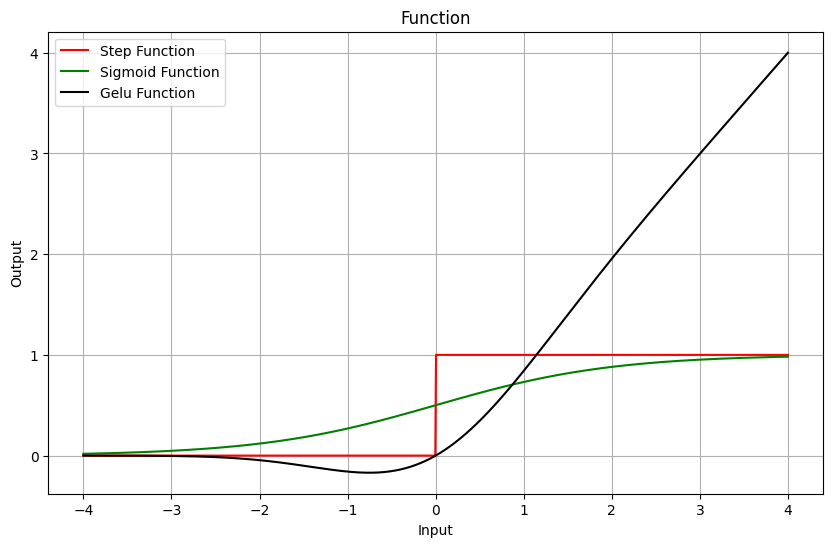

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))
def sigmoid(x):
    return 1/(1+np.exp(-x))
def stepfunction(x):
    return np.array(x>0,dtype=int)

# 입력값 생성
x_values = np.linspace(-4, 4, 1000)

# Gelu 함수 계산
step_y = stepfunction(x_values)
sig_y = sigmoid(x_values)
gelu_y = gelu(x_values)
# 그래프 그리기
plt.figure(figsize=(10, 6))
#plt.plot(x_values, x_values, label='Original', color='blue')
plt.plot(x_values, step_y, label='Step Function', color='red')
plt.plot(x_values, sig_y, label='Sigmoid Function', color='green')
plt.plot(x_values, gelu_y, label='Gelu Function', color='black')
plt.title('Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
A1 = A
print(A1)
print(sigmoid(A))
print(gelu(A))

[  4.    5.1 -16.5]
[9.82013790e-01 9.93940199e-01 6.82560291e-08]
[ 3.99992975  5.09999988 -0.        ]


In [7]:
A = (gelu(A)**24)
print(A)
A = A**(1/24)
print(A)

[2.81356366e+14 9.58702788e+16 0.00000000e+00]
[3.99992975 5.09999988 0.        ]


In [8]:
A1 = sigmoid(A)
W2 = np.array([[1,2],[1,5],[3,1]])
B2 = np.array([1.0,0.6])
A2 = np.dot(A1,W2) + B2
print(A2)

[4.47595275 8.03372609]


In [9]:
A2 = gelu(A2)
W2 = np.array([[1,2],[1,5]])
B2 = np.array([1.0,0.6])
A3 = np.dot(A2,W2)+B2
print(A3)
print(A3.shape)

[13.50967295 49.72052415]
(2,)


In [10]:
def softmax(x):
    c = np.max(x)
    return np.exp(x-c) / np.sum(np.exp(x-c))
print(softmax(A3))
print(np.sum(softmax(A3)))

[1.87856893e-16 1.00000000e+00]
1.0


In [37]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
(x_train,y_train),(x_test,y_test) = load_mnist(flatten=True)
img = x_train[0]
label = y_train[0]
print(label)
img = img.reshape(28,28)
print(img.shape)
img_show(img)

5
(28, 28)


In [43]:
import sys, os
sys.path.append(os.pardir)
import pickle
from common.functions import sigmoid, softmax

def get_data():
    (x_train,y_train),(x_test,y_test) = load_mnist(normalize=True,flatten=True)
    return x_test,y_test

def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    B1,B2,B3 = network['b1'],network['b2'],network['b3']
    
    a1 = sigmoid(np.dot(x,W1) +B1)
    a2 = sigmoid(np.dot(a1,W2) +B2)
    a3 = softmax(np.dot(a2,W3) +B3)
    return a3

x, t = get_data()
print(x[0].shape)
print(t[0].shape)
network = init_network()
accuary_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)    
    if p == np.argmax(t[i]):
        accuary_cnt += 1
print("정확도",str(float(accuary_cnt)/len(x)))


(784,)
()
정확도 0.1024


In [45]:
import sys, os
sys.path.append(os.pardir)
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train,y_train),(x_test,y_test) = load_mnist(normalize=True,flatten=True,one_hot_label=True)
    return x_test,y_test

def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    B1,B2,B3 = network['b1'],network['b2'],network['b3']
    
    a1 = sigmoid(np.dot(x,W1) +B1)
    
    a2 = sigmoid(np.dot(a1,W2) +B2)
    a3 = softmax(np.dot(a2,W3) +B3)
    return a3

x, t = get_data()
network = init_network()
batch_size = 100
accuary_cnt = 0
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)    
    accuary_cnt += np.sum(p==np.argmax(t[i:i+batch_size],axis=1))
print("정확도",str(float(accuary_cnt)/len(x)))

정확도 0.9352
